In [21]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

path = "./data/new.csv"
corona = spark.read.format('csv').options(header=True, sep=";").load(path)
corona.show()

+---+----------+---+
|dep|      jour| nb|
+---+----------+---+
| 01|2020-03-18|  1|
| 02|2020-03-18|  4|
| 03|2020-03-18|  2|
| 04|2020-03-18|  2|
| 05|2020-03-18|  2|
| 06|2020-03-18|  5|
| 07|2020-03-18|  3|
| 08|2020-03-18|  1|
| 09|2020-03-18|  1|
| 10|2020-03-18|  1|
| 11|2020-03-18|  3|
| 12|2020-03-18|  1|
| 13|2020-03-18| 12|
| 14|2020-03-18|  1|
| 15|2020-03-18|  1|
| 16|2020-03-18|  1|
| 17|2020-03-18|  2|
| 18|2020-03-18|  0|
| 19|2020-03-18|  0|
| 21|2020-03-18|  2|
+---+----------+---+
only showing top 20 rows



In [23]:
#Nombre d'hospitalisation dans le département 19 
coronaDep19 = corona.filter(corona["dep"]=="19")
coronaDep19.show()

+---+----------+---+
|dep|      jour| nb|
+---+----------+---+
| 19|2020-03-18|  0|
| 19|2020-03-19|  1|
| 19|2020-03-20|  1|
| 19|2020-03-21|  1|
| 19|2020-03-22|  2|
| 19|2020-03-23|  2|
| 19|2020-03-24|  2|
| 19|2020-03-25|  2|
| 19|2020-03-26|  2|
| 19|2020-03-27|  4|
| 19|2020-03-28|  4|
| 19|2020-03-29|  4|
| 19|2020-03-30|  4|
| 19|2020-03-31|  4|
| 19|2020-04-01|  4|
| 19|2020-04-02|  4|
| 19|2020-04-03|  4|
| 19|2020-04-04|  4|
| 19|2020-04-05|  4|
| 19|2020-04-06|  4|
+---+----------+---+
only showing top 20 rows



In [67]:
#jour ou le nombre moyen d'hospitalisation est le plus élévé 
coronaDays = corona.groupBy("jour")
averagePerDays = coronaDays.agg({"nb": "mean"})

dayRowWithBiggestAverage = averagePerDays.sort(['avg(nb)'], ascending=False).collect()[0]

dayWithBiggestAverage = dayRowWithBiggestAverage['jour']

dayWithBiggestAverage

#averagePerDays.collect()

'2021-01-20'

In [79]:
#jour ou le nombre moyen d'hospitalisation est le moins élévé 
coronaDays = corona.groupBy("jour")
averagePerDays = coronaDays.agg({"nb": "mean"})

dayRowWithLowestAverage = averagePerDays.sort(['avg(nb)'], ascending=True).collect()[0]

dayWithLowestAverage = dayRowWithLowestAverage['jour']

dayWithLowestAverage

'2020-03-18'

In [82]:
#liste du + petit nombre de cas au + grand
coronaDays = corona.groupBy("jour")
averagePerDays = coronaDays.agg({"nb": "mean"})

averagePerDays.sort(['avg(nb)'], ascending=True).collect()

[Row(jour='2020-03-18', avg(nb)=2.742574257425743),
 Row(jour='2020-03-19', avg(nb)=3.198019801980198),
 Row(jour='2020-03-20', avg(nb)=3.6831683168316833),
 Row(jour='2020-03-21', avg(nb)=3.9405940594059405),
 Row(jour='2020-03-22', avg(nb)=4.138613861386139),
 Row(jour='2020-03-23', avg(nb)=4.405940594059406),
 Row(jour='2020-03-24', avg(nb)=4.633663366336633),
 Row(jour='2020-03-25', avg(nb)=5.158415841584159),
 Row(jour='2020-03-26', avg(nb)=5.5049504950495045),
 Row(jour='2020-03-27', avg(nb)=5.930693069306931),
 Row(jour='2020-03-28', avg(nb)=6.227722772277228),
 Row(jour='2020-03-29', avg(nb)=6.356435643564357),
 Row(jour='2020-03-30', avg(nb)=6.603960396039604),
 Row(jour='2020-03-31', avg(nb)=6.9504950495049505),
 Row(jour='2020-04-01', avg(nb)=7.405940594059406),
 Row(jour='2020-04-02', avg(nb)=7.891089108910891),
 Row(jour='2020-04-03', avg(nb)=8.118811881188119),
 Row(jour='2020-04-04', avg(nb)=8.405940594059405),
 Row(jour='2020-04-05', avg(nb)=8.425742574257425),
 Row(jou

In [64]:
#liste des jours pour les données
listOfDays = corona.groupBy('jour').agg({}).collect()
listOfDays

[Row(jour='2020-04-13'),
 Row(jour='2020-06-24'),
 Row(jour='2020-06-08'),
 Row(jour='2020-09-12'),
 Row(jour='2020-11-12'),
 Row(jour='2020-04-12'),
 Row(jour='2020-06-20'),
 Row(jour='2020-06-22'),
 Row(jour='2020-04-20'),
 Row(jour='2020-12-22'),
 Row(jour='2021-01-15'),
 Row(jour='2020-07-25'),
 Row(jour='2020-12-17'),
 Row(jour='2020-12-25'),
 Row(jour='2020-09-11'),
 Row(jour='2020-06-09'),
 Row(jour='2020-11-10'),
 Row(jour='2020-08-06'),
 Row(jour='2020-09-20'),
 Row(jour='2020-11-29'),
 Row(jour='2020-12-15'),
 Row(jour='2020-05-14'),
 Row(jour='2020-06-12'),
 Row(jour='2020-11-19'),
 Row(jour='2020-12-16'),
 Row(jour='2020-04-22'),
 Row(jour='2020-09-06'),
 Row(jour='2020-10-18'),
 Row(jour='2020-08-29'),
 Row(jour='2020-09-14'),
 Row(jour='2020-10-24'),
 Row(jour='2020-05-30'),
 Row(jour='2020-05-13'),
 Row(jour='2020-04-19'),
 Row(jour='2020-06-28'),
 Row(jour='2020-10-20'),
 Row(jour='2020-08-05'),
 Row(jour='2020-09-16'),
 Row(jour='2020-10-21'),
 Row(jour='2020-10-29'),


In [73]:
#Nombre d'hospitalisation par departement sur les deux dernières semaines 
from datetime import datetime, timedelta

today = datetime.now()
twoWeeksAgo = today - timedelta(14)

twoWeeksAgoFormated = datetime.strftime(twoWeeksAgo, "%Y-%m-%d")


recentList = corona.filter(corona["jour"]>twoWeeksAgoFormated)
recentList.show()


+---+----------+---+
|dep|      jour| nb|
+---+----------+---+
| 01|2021-01-08| 20|
| 02|2021-01-08| 14|
| 03|2021-01-08|  9|
| 04|2021-01-08| 13|
| 05|2021-01-08| 12|
| 06|2021-01-08| 44|
| 07|2021-01-08| 21|
| 08|2021-01-08|  9|
| 09|2021-01-08|  3|
| 10|2021-01-08|  9|
| 11|2021-01-08| 12|
| 12|2021-01-08| 10|
| 13|2021-01-08| 82|
| 14|2021-01-08| 16|
| 15|2021-01-08|  6|
| 16|2021-01-08|  6|
| 17|2021-01-08| 12|
| 18|2021-01-08|  8|
| 19|2021-01-08|  5|
| 21|2021-01-08| 19|
+---+----------+---+
only showing top 20 rows



In [78]:
#Somme tous les cas par départements sous deux semaines (trié par nombre de cas hospitalisé ascendant)

recentListSum = recentList.groupBy('dep').agg({"nb": "sum"})
recentListSum.sort(['sum(nb)']).collect()


[Row(dep='976', sum(nb)=13.0),
 Row(dep='90', sum(nb)=26.0),
 Row(dep='973', sum(nb)=39.0),
 Row(dep='09', sum(nb)=39.0),
 Row(dep='2B', sum(nb)=52.0),
 Row(dep='48', sum(nb)=52.0),
 Row(dep='40', sum(nb)=58.0),
 Row(dep='47', sum(nb)=65.0),
 Row(dep='19', sum(nb)=65.0),
 Row(dep='55', sum(nb)=65.0),
 Row(dep='86', sum(nb)=65.0),
 Row(dep='972', sum(nb)=65.0),
 Row(dep='16', sum(nb)=78.0),
 Row(dep='24', sum(nb)=78.0),
 Row(dep='15', sum(nb)=79.0),
 Row(dep='23', sum(nb)=86.0),
 Row(dep='2A', sum(nb)=91.0),
 Row(dep='82', sum(nb)=100.0),
 Row(dep='70', sum(nb)=103.0),
 Row(dep='32', sum(nb)=103.0),
 Row(dep='974', sum(nb)=104.0),
 Row(dep='18', sum(nb)=104.0),
 Row(dep='46', sum(nb)=104.0),
 Row(dep='65', sum(nb)=104.0),
 Row(dep='08', sum(nb)=117.0),
 Row(dep='03', sum(nb)=117.0),
 Row(dep='79', sum(nb)=117.0),
 Row(dep='10', sum(nb)=117.0),
 Row(dep='971', sum(nb)=130.0),
 Row(dep='53', sum(nb)=130.0),
 Row(dep='39', sum(nb)=130.0),
 Row(dep='12', sum(nb)=130.0),
 Row(dep='87', sum(n

In [ ]:
#2/3 pandas a faire 

In [88]:
import sys
!conda install --yes --prefix {sys.prefix} geopandas


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.74.0           |       hc6e9bd1_2        16.3 MB  conda-forge
    cairo-1.16.0               |    h7979940_1007         1.5 MB  conda-forge
    cfitsio-3.470              |       h2e3daa1_7         1.3 MB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.1                |     pyhd8ed1ab_0          10 KB  conda-forge
    curl-7.71.1                |       he644dc0_8         139 KB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  con

In [89]:
import sys
!conda install --yes --prefix {sys.prefix} descartes


Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - descartes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    descartes-1.1.0            |             py_4           7 KB  conda-forge
    ------------------------------------------------------------
                                           Total:           7 KB

The following NEW packages will be INSTALLED:

  descartes          conda-forge/noarch::descartes-1.1.0-py_4



descartes-1.1.0      | 7 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [90]:
from pyspark.sql import SparkSession
from matplotlib import pyplot
import geopandas


In [91]:
spark = SparkSession.builder.getOrCreate()

path = "./data/new.csv"
corona = spark.read.format('csv').options(header=True, sep=";").load(path)
corona.show()

+---+----------+---+
|dep|      jour| nb|
+---+----------+---+
| 01|2020-03-18|  1|
| 02|2020-03-18|  4|
| 03|2020-03-18|  2|
| 04|2020-03-18|  2|
| 05|2020-03-18|  2|
| 06|2020-03-18|  5|
| 07|2020-03-18|  3|
| 08|2020-03-18|  1|
| 09|2020-03-18|  1|
| 10|2020-03-18|  1|
| 11|2020-03-18|  3|
| 12|2020-03-18|  1|
| 13|2020-03-18| 12|
| 14|2020-03-18|  1|
| 15|2020-03-18|  1|
| 16|2020-03-18|  1|
| 17|2020-03-18|  2|
| 18|2020-03-18|  0|
| 19|2020-03-18|  0|
| 21|2020-03-18|  2|
+---+----------+---+
only showing top 20 rows



In [92]:
avgCasesByDep = corona.groupBy('dep').agg({"nb": "mean"}).toPandas()

In [98]:
fp = "./data/departements/departements.shp"
map_df = geopandas.read_file(fp)
map_df.head()

def genFrance(variable, data, title):
    merged = map_df.set_index('code_insee').join(data.set_index('dep'))
    # set the range for the choropleth
    vmin, vmax = 120, 220
    # create figure and axes for Matplotlib
    fig, ax = pyplot.subplots(1, figsize=(10, 6))

    map = merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(28, 24))

    map.set_xlim(-10, 15)
    map.set_ylim(40, 55)
    map.axis('off')
    map.set_title(title, fontdict={"fontsize": "25", "fontweight" : "3"})

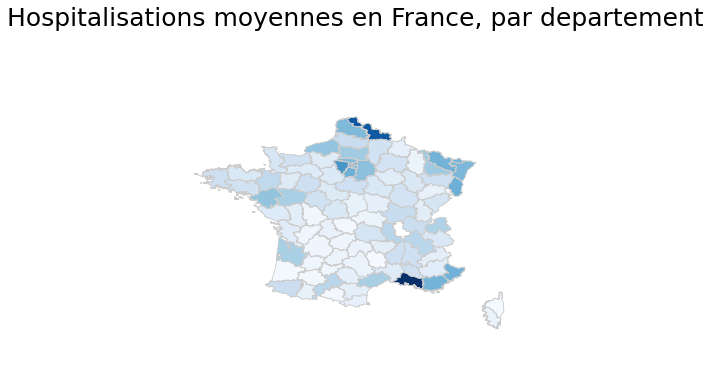

In [99]:
genFrance('avg(nb)', avgCasesByDep, "Hospitalisations moyennes en France, par departement")

In [100]:
 avgCasesByDep

,dep,avg(nb)
0,07,14.582524
1,51,12.731392
2,15,5.288026
3,54,24.475728
4,11,6.831715
...,...,...
96,972,2.449838
97,80,15.627832
98,50,11.045307
99,45,14.171521


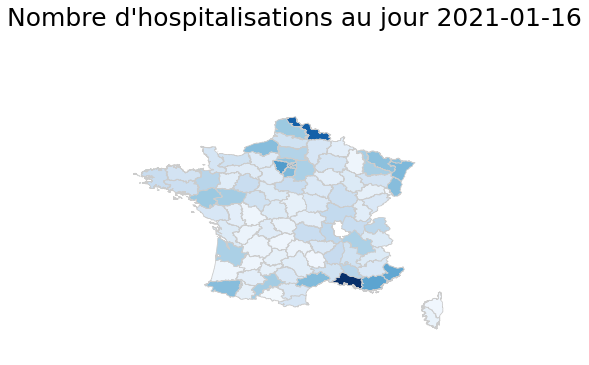

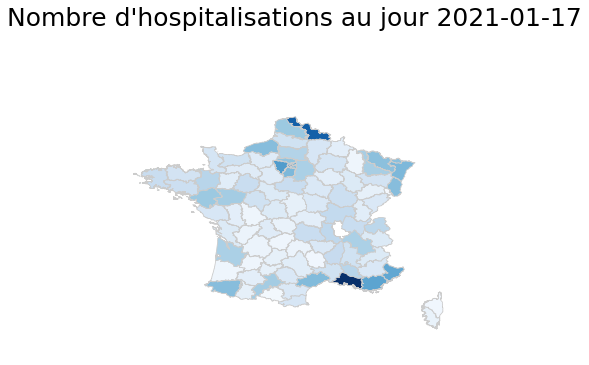

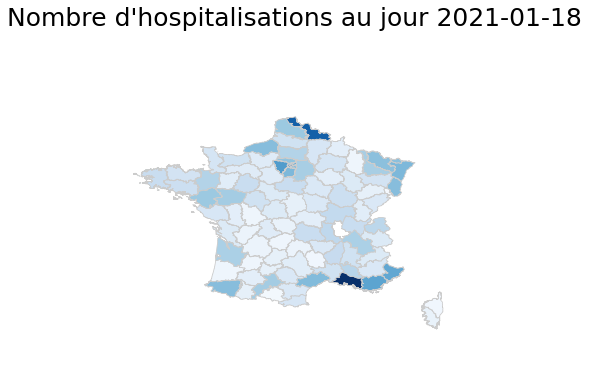

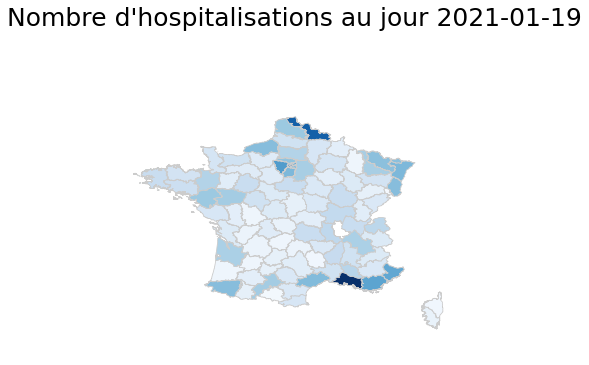

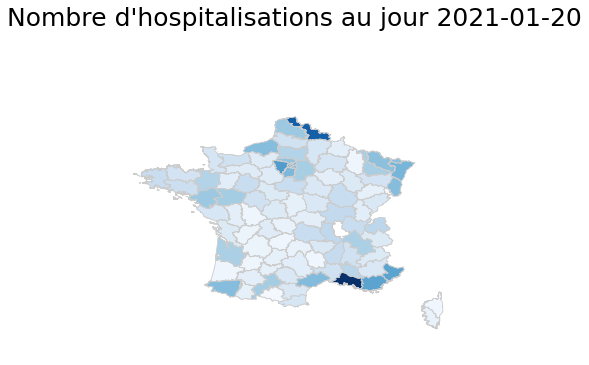

In [103]:
import pandas as pd # plus pratique d'utiliser panda pour parser le csv
from datetime import datetime, timedelta

lastWeek = datetime.now() - timedelta(7)
lastWeekFormatted = datetime.strftime(lastWeek, '%Y-%m-%d')

coronaPandas = pd.read_csv("./data/new.csv", sep=";")

coronaPandasList = coronaPandas['jour'].tolist()

lastWeek = datetime.now()
uniqueDays = [j for j in set(coronaPandasList) if j > lastWeekFormatted]
uniqueDays.sort()

for jour in uniqueDays:
    genFrance('nb', coronaPandas[jour == coronaPandas['jour']], 'Nombre d\'hospitalisations au jour ' + jour)
    

In [ ]:
#toutes les données sont très similaires, il y a donc très peu de différences sur les maps 